## Naive Bayes

You will be dealing with movie review data that includes both positive and negative reviews in this assignment. You will use Sentiment Analysis to assess if a given review is positive or negative using the provided dataset.

Therefore, we will make use of Naive Bayes algorithm to perform sentiment analysis on the movie review dataset.

## Importing the Libraries

In [ ]:
import numpy as np
import math
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import warnings
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sakthikripaselvan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sakthikripaselvan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sakthikripaselvan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sakthikripaselvan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Reading the data

When reading the data, ensure that the '.csv' file is in the same location where your jupyter notebook is used. This way the files are organized and easy to read using the pandas library. 

In [ ]:
## Reading the data and removing columns that are not important. 
df = pd.read_csv("movie_reviews.csv", sep = ',', encoding = 'latin-1', usecols = lambda col: col not in ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [ ]:
# Displaying first few rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive
4,"Probably my all-time favorite movie, a story o...",positive


## Count plot of the output categories: positive or negative

Feel free to take a look at the output and whether the classes are balanced or imbalanced. 

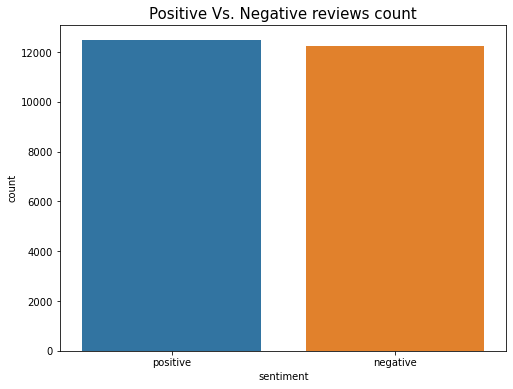

In [ ]:
# Bar plot to examine for class imbalance in the data
plt.figure(figsize = (8,6))
sns.countplot(x="sentiment", data=df)
plt.title("Positive Vs. Negative reviews count", fontsize = 15)
plt.show()

## Upsampling the minority class: (5 points)

It is known that Naive bayes is not robust to class imbalance. It could be seen above that the data is little imbalanced. Therefore, class balancing can be done before giving it to the Naive Bayes model for prediction. 

Feel free to use 'resample' library from sklearn. 

In [ ]:
## hint: use resample from sklearn.utils
from sklearn.utils import resample

df_majority = df[df['sentiment'] == "positive"]
df_minority = df[df['sentiment'] == "negative"]

negative_upsample = resample(df_minority, replace = True, 
                        n_samples = df_majority.shape[0],
                        random_state = 101)

df_upsampled = pd.concat([df_majority, negative_upsample])  # concat two data frames i,e majority class data set and upsampled minority class data set
df_upsampled = df_upsampled.sample(frac = 1)

In [ ]:
## Just to ensure that upsampling was done successfully, take a look at the shape of the data in 
## this cell. 

# print the shape of data set with the help of shape function having "negative" as class label
df_upsampled[df_upsampled['sentiment'] == "negative"].shape

(12474, 2)

### Expected Output : 
(12474, 2)

In [ ]:
## Ensure that the same number of data points are present for both 'positive' and 'negative' data

# print the shape of data set with the help of shape function having "positive" as class label
df_upsampled[df_upsampled['sentiment'] == "positive"].shape

(12474, 2)

### Expected Output : 
(12474, 2)

In [ ]:
## In this cell, we are going to be dividing the data into train and test points
## Ensure that you store the upsampled data in a variable called 'df_upsampled' 
## so that the below operations are performed successfully


## Considering 10000 positive and 10000 negative data points
negative_data_points_train = df_upsampled[df_upsampled['sentiment'] == "negative"].iloc[:10000]
positive_data_points_train = df_upsampled[df_upsampled['sentiment'] == "positive"].iloc[:10000]

## Considering the remaining data points for test
negative_data_points_test = df_upsampled[df_upsampled['sentiment'] == "negative"].iloc[10000:]
positive_data_points_test = df_upsampled[df_upsampled['sentiment'] == "positive"].iloc[10000:]


## Concatenate the training positive and negative reviews
X_train = pd.concat([negative_data_points_train['review'], positive_data_points_train['review']])
## Concatenating the training positive and negative outputs
y_train = pd.concat([negative_data_points_train['sentiment'], positive_data_points_train['sentiment']])

## Concatenating the test positive and negative reviews
X_test = pd.concat([negative_data_points_test['review'], positive_data_points_test['review']])
## Concatenating the test positive and negative outputs
y_test = pd.concat([negative_data_points_test['sentiment'], positive_data_points_test['sentiment']])


In [ ]:
## Take a look at the total number of classes and their count using '.value_counts()' for y_train and y_test.
## Ensure that there are equal number of positive and negative reviews. 
y_train.value_counts()

negative    10000
positive    10000
Name: sentiment, dtype: int64

### Expected Output:
negative    10000<br>
positive    10000<br>
Name: sentiment, dtype: int64

In [ ]:
y_test.value_counts()

negative    2474
positive    2474
Name: sentiment, dtype: int64

### Expected Output : 
negative    2474<br>
positive    2474<br>
Name: sentiment, dtype: int64

# Pre-process the reviews: (10 points)

We know that a review contains links, punctuation, stopwords and many other words that don't give a lot of meaning for the Naive Bayes model for prediction. 

In the cell below, one must implement text-preprocessing and remove links, punctuations and stopwords. It is also important to lowercase the letters so that 'Admire' and 'admire' are not treated as different words. 

In addition to this, perform stemming operation so that similar words are reduced. To know more about stemming, feel free to take a look at this link.

https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

In [ ]:
# TASK CELL

def clean_review(review):
 
    '''
    Input:
        review: a string containing a review.
    Output:
        review_cleaned: a processed review. 

    '''
    # Converting the reviews to lowercase
    review_cleaned = review.lower()

    # Removing HTML patterns like <br />
    html_pattern = re.compile('<.*?>')
    review_cleaned = html_pattern.sub(r'', review_cleaned) 

    # Removing url's if any in the code
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    review_cleaned = url_pattern.sub(r'', review_cleaned)

    # List of stop words
    stop_words = set(stopwords.words('english')) 

    # Tokenizing the words while removing punctuations 
    tokenizer = RegexpTokenizer(r'\w+')
    tokenwords = tokenizer.tokenize(review_cleaned) 
    
    # Removing stop words using the list created above
    result = [] 
    for w in tokenwords: 
      if w not in stop_words: 
        result.append(w)
    
    # Lemmatizing the words
    # Performing lemmatization instead of suggested stemming as lemmatization improved the accuracy of the model
    lemmatizer = WordNetLemmatizer()
    review_cleaned = [lemmatizer.lemmatize(w) for w in result]

    # ps = PorterStemmer()
    # review_cleaned = [ps.stem(w) for w in result]

    # Joining the list of words back into a string
    review_cleaned = " ".join(review_cleaned)

    return review_cleaned

# Implement a find_occurrence function (5 points):

In this function, we find the total occurrence of a word giving information such as label, word and frequency dictionary.

Note that this function is used later in the code when we are going to be predicting the output using Naive Bayes. 

In [ ]:
# TASK CELL
def find_occurrence(frequency, word, label):
    '''
    Params:
        frequency: a dictionary with the frequency of each pair (or tuple)
        word: the word to look up
        label: the label corresponding to the word
    Return:
        n: the number of times the word with its corresponding label appears.
    '''
    for y, word in zip(label, word):
       pair = (word, y)
       
       # if the key exists in the dictionary, increment the count
       
       if pair in frequency:
         frequency[pair] += 1
         
       # else, if the key is new, add it to the dictionary and set the count to 1
       else:
         frequency[pair] = 1

    
    n = frequency.values()
    return n

### Converting output to numerical format:

We have outputs as 'positive' or 'negative'. In the cell below, we convert it to a numerical format. 

In [ ]:
## With the use of mapping function, we replace
## the label in the form of string to an integer. 

output_map = {'positive': 0, 'negative': 1}
y_train = y_train.map(output_map)
y_test = y_test.map(output_map)

In [ ]:
## Ensuring that there are equal number of classes on the training data. 
y_train.value_counts()

1    10000
0    10000
Name: sentiment, dtype: int64

In [ ]:
## Choosing a random review and taking a look at it.
X_train.iloc[0]

'It was only a matter of time that a spoof would be made of sports movies! And there are plenty of movies to be spotted which are made fun off. But the biggest problem I had was the fact that it stays with recognizing movies. The director and writers of "The Comebacks" somehow forget to get creative. While I must admit that I laughed at certain scenes,"The Comebacks" could have been so much funnier. The actors forget to deliver their lines seriously and have a straight face throughout the movie. A spoof demands this and that is the main reason why silly jokes work in movies like this. Because of the failure of the cast to do so the jokes never hit their mark. Some scenes take forever and normally in spoofs that doesn\'t have to be a problem. Take "Naked Gun" for instance. Their is always something happening on screen. In "The Comebacks" they didn\'t even bother to let stuff happening in the background. Only a couple of factors make this movie worth watching! It still is fun to spot the

From the above cell output, it could be seen that there are a lot of words that don't add a lot of meaning to the text. 

Therefore, those words would be removed. It also reduces the computation time. 

Therefore, it is a good practice we are following.

In [ ]:
custom_review = X_train.iloc[0]

# print cleaned review
print(clean_review(custom_review))

matter time spoof would made sport movie plenty movie spotted made fun biggest problem fact stay recognizing movie director writer comeback somehow forget get creative must admit laughed certain scene comeback could much funnier actor forget deliver line seriously straight face throughout movie spoof demand main reason silly joke work movie like failure cast joke never hit mark scene take forever normally spoof problem take naked gun instance always something happening screen comeback even bother let stuff happening background couple factor make movie worth watching still fun spot movie made fun jermaine williams ipod parody cuba gooding jr radio hilarious seemed one cast get idea spoof entirely bad


We now use this function to pre-process the review and remove words that don't add a lot of meaning in our model. 

# Implementing review counter function: (5 points)

It is now time to implement the count function for the reviews. 

In this function, we count the occurrence of words and get the probabilities 
for the words based on the training data. 

In other words, we get the probability of occurrence of a word, given that the output is 'positive'.

Similarly, we also compute the probability of occurence of a word, given that the output is 'negative'.



In [ ]:
# TASK CELL
def review_counter(output_occurrence, reviews, positive_or_negative):
    '''
    Params:
        output_occurrence: a dictionary that will be used to map each pair to its frequency
        reviews: a list of reviews
        positive_or_negative: a list corresponding to the sentiment of each review (either 0 or 1)
    Return:
        output: a dictionary mapping each pair to its frequency
    '''
    ## Steps :
    # define the key, which is the word and label tuple
    # if the key exists in the dictionary, increment the count
    # else, if the key is new, add it to the dictionary and set the count to 1
    
    for label, review in zip(positive_or_negative, reviews):
      split_review = clean_review(review).split()
      for word in split_review:
        
        pair = (word, label)
        # if the key exists in the dictionary, increment the count
        
        if pair in output_occurrence:
          output_occurrence[pair] += 1
         
        # else, if the key is new, add it to the dictionary and set the count to 1
        
        else:
         output_occurrence[pair] = 1
   
    return output_occurrence
   


### Test your function with example reviews:

Feel free to run the cell below and understand whether the above function that you have defined is producing the optimum results. 

In [ ]:
# Testing your function

result = {}
reviews = ['got bored throught the moview', 'The movie was fantastic', 'Will not watch it again', 
           'Was bored, it was a complete waste of time and money', 'Enjoyed the movie to the fullest']
ys = [1, 0, 1, 1, 0]
review_counter(result,reviews, ys)

{('got', 1): 1,
 ('bored', 1): 2,
 ('throught', 1): 1,
 ('moview', 1): 1,
 ('movie', 0): 2,
 ('fantastic', 0): 1,
 ('watch', 1): 1,
 ('complete', 1): 1,
 ('waste', 1): 1,
 ('time', 1): 1,
 ('money', 1): 1,
 ('enjoyed', 0): 1,
 ('fullest', 0): 1}

### Expected Output:
 {('bored', 1): 2, <br>
 ('complete', 1): 1, <br>
 ('enjoyed', 0): 1, <br>
 ('fantastic', 0): 1, <br>
 ('fullest', 0): 1, <br>
 ('got', 1): 1, <br>
 ('money', 1): 1, <br>
 ('movie', 0): 2, <br>
 ('moview', 1): 1, <br>
 ('throught', 1): 1, <br>
 ('time', 1): 1, <br>
 ('waste', 1): 1, <br>
 ('watch', 1): 1}

In [ ]:
# Build the freqs dictionary for later uses

freqs = review_counter({}, X_train, y_train)

In [ ]:
## Run this cell to get an idea about the corpus of words and their occurrence along with labels. 
## In this, we are computing the frequency of occurrence of word given that a review is 'positive'.
## Similarly, we also compute the frequence of occurence of word given that a review is 'negative'.
# Displaying the first few entries in the frqs dictionary
list(freqs.items())[:5]

[(('matter', 1), 564),
 (('time', 1), 6047),
 (('spoof', 1), 145),
 (('would', 1), 5891),
 (('made', 1), 3484)]

# Training the Naive Bayes Model: (20 points)

Now we are in the training phase of the Naive Bayes algorithm. In this cell, take a look at the ways to calculate the log likelihood and log prior values as these are important for testing in the next few cells. 

Also calculate the frequency of occurrence of words where the output is negative. In the same way, calculate the word frequency count using the above functions in order to compute the log likelihood.

Return the logprior and loglikelihood output by the model from this function. 

In [ ]:
def train_naive_bayes(freqs, train_x, train_y):
    '''
    Input:
        freqs: dictionary from (word, label) to how often the word appears
        train_x: a list of reviews
        train_y: a list of labels correponding to the reviews (0,1)
    Output:
        logprior: the log prior. (equation 3 above)
        loglikelihood: the log likelihood of you Naive bayes equation. (equation 6 above)
    '''
    loglikelihood = {}
    logprior = 0


    # calculate V, the number of unique words in the vocabulary
    vocab = [pair[0] for pair in freqs.keys()]
    V = len(vocab)

    # calculate num_pos and num_neg - the total number of positive and negative words for all documents
    num_pos = num_neg = 0
    for pair in freqs.keys():
        # if the label is 0
        if pair[1] == 0:

            # Increment the number of positive words by the count for this (word, label) pair
            num_pos += freqs[pair]

        # else, the label is negative
        else:

            # increment the number of negative words by the count for this (word,label) pair
            num_neg += freqs[pair]

    # Calculate num_doc, the number of documents
    num_doc = len(train_x)

    # Calculate D_pos, the number of positive documents 
    neg_num_docs = train_y[train_y == 1].count()

    # Calculate D_neg, the number of negative documents 
    pos_num_docs = train_y[train_y == 0].count()

    # Calculate logprior
    logprior = np.log(neg_num_docs) - np.log(pos_num_docs)


    # For each word in the vocabulary...
    for word in vocab:
        # get the positive and negative frequency of the word
        freq_pos = freqs.get((word, 0), 0)
        freq_neg = freqs.get((word, 1), 0)

        # calculate the probability that each word is positive, and negative
        p_w_pos = (freq_pos + 1)/(num_pos + V)
        p_w_neg = (freq_neg + 1)/(num_neg + V)

        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_neg)-np.log(p_w_pos)


    return logprior, loglikelihood



In [ ]:
# You do not have to input any code in this cell, but it is relevant to grading, so please do not change anything
logprior, loglikelihood = train_naive_bayes(freqs, X_train, y_train)
print(logprior)
print(len(loglikelihood))

0.0
59766


### Expected Output 

0.0 <br>
91425

# Implementing Naive Bayes Predict Function: (10 points)

It is now time to make our prediction as to whether a given review is negative or positive respectively. 

After adding the log likelihood values, ensure that the output is 1 (negative) if the sum of the log likelihood value is greater than 0 and 0 (positive) if the sum of the log likelihood is less than or equal to 0. 

In [ ]:
# TASK 4 CELL
def naive_bayes_predict(review, logprior, loglikelihood):
    '''
    Params:
        review: a string
        logprior: a number
        loglikelihood: a dictionary of words mapping to numbers
    Return:
        total_prob: the sum of all the loglikelihoods of each word in the review (if found in the dictionary) + logprior (a number)

    '''
    
      # process the review to get a list of words
    word_l = clean_review(review).split()

    # initialize probability to zero
    total_prob = 0

    # add the logprior
    total_prob += logprior
    for word in word_l:
        # check if the word exists in the loglikelihood dictionary
        if word in loglikelihood:
            # add the log likelihood of that word to the probability
            total_prob += loglikelihood[word]

    if total_prob > 0:
      p = 1
    else: 
      p = 0

    # Changed the function to return both probability and class valued
    return total_prob, p

In [ ]:
# You do not have to input any code in this cell, but it is relevant to grading, so please do not change anything

# Experiment with your own review.
my_review = "I thought this series was going to be another fun, action series with some dynamic plots and great performances. I was wrong. While I like Jamie Denton, this show is hardly worth watching at all, unless you enjoy watching some people brutalized and the actions of the agents supposedly warranted under the theme of national security. The show is great propaganda for the current government, and spews out jingoism as though we talk that way every day. After a couple of episodes, it was boring the hell out of me, and I started watching reruns of House Invaders on BBCAmerica instead. Rather watch CSI and Without a Trace, without a doubt."
total_prob, p = naive_bayes_predict(my_review, logprior, loglikelihood)
print('The expected output is', p)

The expected output is 1


### Expected Output :
The expected output is 1

# Implementing Naive Bayes Test function: (10 points)

In this function, implement the previous functions such as naive_bayes_predict to get the predictions for the test set. 

In addition to this, the function should return the total number of reviews that it correctly classified as 'positive' or 'negative'. 

In [ ]:
# UNQ_C6 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def test_naive_bayes(test_x, test_y, logprior, loglikelihood):
    """
    Input:
        test_x: A list of reviews
        test_y: the corresponding labels for the list of reviews
        logprior: the logprior
        loglikelihood: a dictionary with the loglikelihoods for each word
    Output:
        accuracy: (# of reviews classified correctly)/(total # of reviews)
    """
    accuracy = 0  

    
    y_hats = []
    for review in test_x:
        # if the prediction is > 0
        if naive_bayes_predict(review, logprior, loglikelihood)[0] > 0:
            # the predicted class is 1
            y_hat_i = 1
        else:
            # otherwise the predicted class is 0
            y_hat_i = 0

        # append the predicted class to the list y_hats
        y_hats.append(y_hat_i)

    # error is the average of the absolute values of the differences between y_hats and test_y
    error = np.mean(np.abs(y_hats-test_y))

    accuracy = 1-error


    return accuracy, y_hats

    

In [ ]:
# For grading purpose only
# You do not have to input any code in this cell, but it is relevant to grading, so please do not change anything

# Run this cell to test your function

for review in ["If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!",
                "What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative direction, too. Some VERY faint echoes of Fargo here, but it just doesn't come off.",
                "I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the romance between Joe and Jean keeps me on the edge of my seat, plus I still think Bryan Brown is the tops. Brilliant Film.",
                "Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement value. About as unentertaining, uninstructive and just plain dull as a film can be."]:
    total_prob, p = naive_bayes_predict(review, logprior, loglikelihood)
    print(f'{review[:100]} -> {p:.2f}')
    

If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 0.00
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 1.00
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 0.00
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 1.00


### Expected Output :

If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 0.00 <br>
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 1.00<br>
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 0.00 <br>
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 1.00



In [ ]:
# Feel free to check the sentiment of your own review below
my_review = 'The moview was very boring, I wanted to leave in the middle'
naive_bayes_predict(my_review, logprior, loglikelihood)[1]

1

### Expected Output :
1

# Evaluate the accuracy (10 Points)
1. Split your data into training and test sets using random selection. Set the seed as parameter of the function so that user can select a different training and test set by changin seed.

2. Calculate model paramters with training set.

3. Print confusion matrix for training and test set.

4. Examine False Positive and False Negative cases and provide reasoning why they get misclassified.

In [ ]:
# Splitting the upsampled dataframe into train and test using the train_test_split
# The data is split into 20% test and 80% train randomly
# The random_state seed can be varied to select a different train and test dataset
X_train, X_test, y_train, y_test = train_test_split(df_upsampled['review'], df_upsampled['sentiment'],
                                                    test_size=0.2, random_state=42)

In [ ]:
# Mapping 'positive' sentiment to 0 and and 'negative' sentiment to 1
output_map = {'positive': 0, 'negative': 1}
y_train = y_train.map(output_map)
y_test = y_test.map(output_map)

In [ ]:
# Calling the review counter function to get the frequency of the words when the label is positive and negative
freqs = review_counter({}, X_train, y_train)

In [ ]:
# Calculating the model paramteres - log prior and log likelihood 
logprior, loglikelihood = train_naive_bayes(freqs, X_train, y_train)
print(logprior)
print(len(loglikelihood))

0.008818576038949644
59519


In [ ]:
# Calculating the accuracy of the model on train data
accuracy, predicted = test_naive_bayes(X_train, y_train, logprior, loglikelihood)
print('Train Accuracy is ',round((accuracy*100), 2),'%')

Train Accuracy is  93.05 %


In [ ]:
# Calculating the accuracy of the model on test data
# We can see that we are getting a good accuracy of ~88%
accuracy_test, predicted_test = test_naive_bayes(X_test, y_test, logprior, loglikelihood)
print('Test Accuracy is ',round((accuracy_test*100), 2),'%')

Test Accuracy is  88.28 %


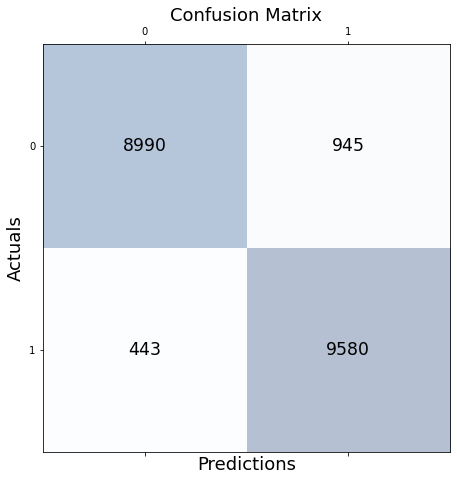

In [ ]:
# Confusion matrix for train data
conf_matrix = confusion_matrix(y_train, predicted)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

We can observe that cases where the actual sentiment is positive but the predicted is negative, occurs more than the vice versa in train data. That is we can see more false negative than false positive cases. 

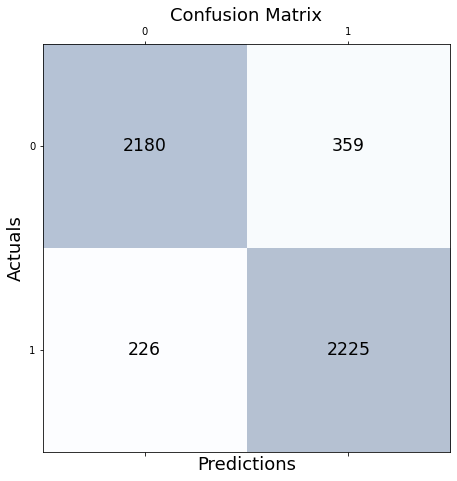

In [ ]:
# Confusion matrix for test data
conf_matrix_1 = confusion_matrix(y_test, predicted_test)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix_1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix_1.shape[0]):
    for j in range(conf_matrix_1.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_1[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Similar to the train data we can observe that test data also has slightly more false negative cases than false positive cases. 

In [ ]:
pd.options.display.max_colwidth = 10000

In [ ]:
# New data frame to examine the review, actual sentiment and predicted sentiment 
examine_df = pd.DataFrame()
examine_df['test_reviews'] = X_test
examine_df['actual_sentiment'] = y_test
examine_df['predicted_sentiment'] = predicted_test
examine_df.head(1)

,test_reviews,actual_sentiment,predicted_sentiment
11188,"I must say one big reason why I thought the AristoCats was so great is because I love cats!!!!I love cats,which probably gave this film a big score from me,but not only that,it was definitely a good movie as well,and I love where they make the setting of the film take place.This is one of my favorite animal films,although it's animated,and I really love how the actors\actresses didn't sound so unprofessional behind the animals' voice's.To me this film seems like a classic,but I guess to IMDb it's not,because it has,yes I THINK too low of a rating.You take a peek at all the other ""ORIGINAL"" Disney films and they have a much higher rating than this,but nonetheless AristoCats is one of the best animation movies there is and I could enjoy it over and over again!!",0,0


In [ ]:
false_negative_df = examine_df[((examine_df['actual_sentiment'] == 0) & (examine_df['predicted_sentiment'] == 1)) ]
false_negative_df.head(2)

,test_reviews,actual_sentiment,predicted_sentiment
8585,"Compared to this, Tarkovsky is a speed freak.<br /><br />Compared to this, Bela Tarr is MTV.<br /><br />Compared to this, the movie ""Russian Ark"" is a roller-coaster ride.<br /><br />I've just described 3 of the sllllowwwwwesssstttt experiences I've ever known, and this one tops them all. But that's not saying it's bad. On the contrary, I really liked it. But it was a chore.<br /><br />I won't describe the plot, because you can easily find that elsewhere. Suffice it to say that the plot is INSANE. It's one of the most creative and bizarre ideas since ""Becoming John Malkovich"". I believe the interesting plot is the main reason I kept from nodding off (also, the humour was nice. That's something we rarely see in slow, artsy films).<br /><br />Here we see a bizarre reversal of the norm. Most movies have little plot & little substance; yet they fill 90 mins with a lot of eyecatching images to keep us enthralled. But ""The Hole"" has 100% plot/theme without much to please the eyes. In that respect, I suppose it's a truly intellectual experience, much like reading a painfully verbose novel like Thackaray's ""Vanity Fair"" (which I've NEVER been able to finish!).<br /><br />If you have a tremendous attention span, I think you'll really like this film. Despite its molassessy pace, it's highly creative and imaginative. It's like Jean-Pierre Jeunet on quaaludes and with a drab, dusty camera lens. Best of luck.",0,1
19831,"Back in the 70's, a small-time Texas filmmaker named S.F. Brownrigg directed a handful of surprisingly decent low-budget drive-in horror flicks which seem to have developed a small cult following over the years. Before viewing his first film, Don't Look In The Basement, I wasn't too sure what to expect, but I sure as hell didn't expect it to turn out to be the only Texas horror I thought was better than the Chainsaw Massacre. I don't know, this might actually be my all-time favorite horror movie.<br /><br />We begin in an isolated insane asylum. At first, it seems like a rather laid-back place to get mentally healthy, considering all the patients are allowed to roam around freely and whatnot, as if it were their house (I guess it is). none of them seem all that dangerous, only delusional. The residents include a love-nympho, a 700 year old woman, a man-child, a spaz, a guy who thinks he's in a war, a woman who thinks she has a baby, and a guy who thinks he's a judge. One day, out of nowhere, Judge kills the doctor with an axe, shortly thereafter, the wanna-be baby mama kills the nurse. Ten minutes into the movie, and things are looking really ugly. Perhaps the new nurse will know what to do, then again, perhaps not. Giving away more would do more harm than good. It's best to plunge head first into this one, knowing as little as possible. If you can appreciate honest-to-God, untampered with horror, then you will not be disappointed. <br /><br />If you liked Scream, if you liked Wrong Turn, if you go for that unoriginal, over-produced, over-scored digital Hollywood garbage, then chances are high you just wont see the beauty in this one. Don't Look In The Basement, being a first attempt makes the quality all the more shocking. The atmosphere and the graininess fit into the location and the score like a glove. Unfortunately, good ol' S.F. used up most of his good ideas on his first movie, although, the next entry in his Texas-sized quadrilogy, is somewhat of a masterpiece, that is, if you're into extra sleazy, mean-spirited, Hixploitation like someone I know. If you fall in love with Brownrigg's first two, and absolutely must find out what else he had to offer, check out Don't Open The Door, and The House Where Hell Froze Over. Don't Look in The Basement has everything that successful horror needs, no stars, no budget, no digital effects, just an original story brought to life in an insane asylum, with a dozen cast members, and a somber, subtle score, and of cour

Looking at a few examples of false negative cases from the test data, few observations are as follows: In the first case the review's actual sentiment is positve but the predicted is negative. This might be because the review is has more words which may be classified as 'negative' the model might have got confused. Since the each word being classified is independent of other words and due to these confusions the model might have misclassified the reviews as negative. 

In [ ]:
false_positive_df = examine_df[((examine_df['actual_sentiment'] == 1) & (examine_df['predicted_sentiment'] == 0)) ]
false_positive_df.tail(2)

,test_reviews,actual_sentiment,predicted_sentiment
18117,"On assignment in scenic Italy, beautiful lip-synching Lana Turner (as Fredda Barlo) meets older singer and prince Ezio Pinza (as Mr. Imperium). The two fall in love, while enjoying the pretty Italian countryside. Unhappily, Mr. Pinza is called away to his Kingly father's death bed, leaving Lana in the lurch. Twelve years later, Ms. Turner is a Los Angeles actress, about to make a motion picture about falling in love with a King. Turner is being romanced by co-star Barry Sullivan, who wants to marry her - then, King Pinza re-enters her lifeÂ <br /><br />""Mr. Imperium"" provides a tired storyline for sex symbol Turner and debuting bass vocalist Pinza, who appeared for several decades with the New York Metropolitan Opera. Pinza likely earned his MGM feature film career after appearing in the hugely successful stage production of ""South Pacific"" (1949). The cast album, and Pinza's golden ""Some Enchanted Evening"" single, sold millions. Supporting casters Marjorie Main, Cedric Hardwicke, and Debbie Reynolds give the film a even greater sense of wasted resources.<br /><br />*** Mr. Imperium (1951) Don Hartman ~ Lana Turner, Ezio Pinza, Barry Sullivan",1,0
3134,"This show comes up with interesting locations as fast as the travel channel. It is billed as reality but in actuality it is pure prime time soap opera. It's tries to use exotic locales as a facade to bring people into a phony contest & then proceeds to hook viewers on the contestants soap opera style.<br /><br />It also borrows from an early CBS game show pioneer- Beat The Clock- by inventing situations for its contestants to try & overcome. Then it rewards the winner money. If they can spice it up with a little interaction between the characters, even better. While the game format is in slow motion versus Beat The Clock- the real accomplishment of this series is to escape reality. <br /><br />This show has elements of several types of successful past programs. Reality television, hardly, but if your hooked on the contestants, locale or contest, this is your cup of tea. If your not, this entire series is as I say, drivel dripping with gravy. It is another show hiding behind the reality label which is the trend it started in 2000.<br /><br />It is slick & well produced, so it might last a while yet. After all, so do re-runs of Gilligan's Island, Green Acres, The Beverly Hillbillies & The Brady Bunch. This just doesn't employ professional actors. The intelligence level is about the same.",1,0


Looking at a few examples of false positive cases from the test data, few observations are as follows: Both the reviews have words like - successful, classic, joy, gratefullness which are often associated with positive reviews. This might be the cause that the model predicted them as 'positive' when they were actually negative reviews.